In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [2]:
df = pd.read_csv('dataset.csv')   
   
   
print("The Number of Samples in the dataset: ", len(df))
print('Class 0        :', round(df['y'].value_counts()[0]
                      /len(df) * 100, 2), '% of the dataset')
   
print('Class 1(Fraud) :', round(df['y'].value_counts()[1]
                      /len(df) * 100, 2), '% of the dataset')

The Number of Samples in the dataset:  40000
Class 0        : 88.72 % of the dataset
Class 1(Fraud) : 11.28 % of the dataset


In [3]:
df=df.dropna(axis=0, subset=['x8'])
# Making a list of missing value types
missing_values = ["unknown"]
df = pd.read_csv("dataset.csv", na_values = missing_values)
df=df.dropna(axis=0, subset=['x8', 'x2', 'x3', 'x4', 'x5', 'x6'])
x=df.drop('y', axis=1)
y=df['y']
x_num=x.drop(['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8'], axis=1)
x_cat=x[['x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8']]

# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(strategy = 'most_frequent')
# imputer.fit(x_num)
# x_num_tr=imputer.transform(x_num)
# x_num_tr_pd = pd.DataFrame(x_num_tr, columns = x_num.columns)
# x_num_tr_pd.isnull().sum() #no missing value in numerical after replacement of data
#use standard Scaler to [defination], to prevent....
#after the standard scaler function, value of mean and stdev will....
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler(copy=False)
# scaler.fit(x_num_tr_pd)
# x_num_tr=scaler.transform(x_num_tr_pd)
# x_num_tr
x_cat_2 = x_cat['x2']
x_cat_3 = x_cat['x3']
x_cat_4 = x_cat['x4']
x_cat_5 = x_cat['x5']
x_cat_6 = x_cat['x6']
x_cat_7 = x_cat['x7']
x_cat_8 = x_cat['x8']

labelencoder = LabelEncoder()
x_cat_4 = labelencoder.fit_transform(x_cat_4)
x_cat_4.shape

lb_encoder_2 = LabelBinarizer()
x_cat_2 = lb_encoder_2.fit_transform(x_cat_2)
x_cat_2.shape

lb_encoder_3 = LabelBinarizer()
x_cat_3 = lb_encoder_3.fit_transform(x_cat_3)
x_cat_3.shape

lb_encoder_5 = LabelBinarizer()
x_cat_5 = lb_encoder_5.fit_transform(x_cat_5)
x_cat_5.shape

lb_encoder_6 = LabelBinarizer()
x_cat_6 = lb_encoder_6.fit_transform(x_cat_6)
x_cat_6.shape

lb_encoder_7 = LabelBinarizer()
x_cat_7 = lb_encoder_7.fit_transform(x_cat_7)
x_cat_7.shape

lb_encoder_8 = LabelBinarizer()
x_cat_8 = lb_encoder_8.fit_transform(x_cat_8)
x_cat_8.shape

x_cat_4 = pd.DataFrame(x_cat_4)
x_cat_4

x_cat_tr = np.hstack([x_cat_2, x_cat_3, x_cat_4, x_cat_5, x_cat_6, x_cat_7, x_cat_8])

x_tr = np.hstack([x_num, x_cat_tr])

y = pd.DataFrame(y)

df_tr = np.hstack([x_tr, y])
df_tr = pd.DataFrame(df_tr)
df_tr.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     6
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [4]:
# write code to separate the output (y) from input (X)
#y refer to classes
x=df_tr.drop(38, axis=1)
y=df_tr[38]
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
37129    1.0
37130    0.0
37131    0.0
37132    0.0
37133    0.0
Name: 38, Length: 37134, dtype: float64

In [5]:
#split 20%test set and 80%training set
#random set is set to 30

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size=0.2, random_state=30)


In [6]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'most_frequent')
imputer.fit(x_train)
x_train_tr=imputer.transform(x_train)
x_train_tr_pd = pd.DataFrame(x_train_tr, columns = x_train.columns)
x_train_tr_pd.isnull().sum() #no missing value in numerical after replacement of data
#use standard Scaler to [defination], to prevent....
#after the standard scaler function, value of mean and stdev will....
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_train_tr_pd)
x_train_tr=scaler.transform(x_train_tr_pd)
x_train_tr

y_train= pd.DataFrame(y_train)
df_train_tr = np.hstack([x_train_tr, y_train])
df_train_tr=pd.DataFrame(df_train_tr)

In [7]:
print(df_train_tr)

             0         1         2         3         4         5         6   \
0      1.279435 -0.436124 -0.206039  0.192076  1.710704 -1.210371 -1.181349   
1     -1.348995 -0.125122 -0.206039  0.192076 -0.346948 -1.210371 -1.181349   
2      0.013894 -0.305580 -0.206039  0.192076 -0.346948 -1.210371 -0.864848   
3      0.208593 -0.662656 -0.567512  0.192076  1.710704 -0.121031 -0.647470   
4      0.792688  2.032692 -0.206039  0.192076 -0.346948  0.647915  0.733311   
...         ...       ...       ...       ...       ...       ...       ...   
29702 -0.570201 -0.854632 -0.567512  0.192076 -0.346948 -0.121031 -0.647470   
29703 -0.764900 -0.846953  0.155433  0.192076 -0.346948  0.840152  0.601145   
29704 -0.180804 -0.835435  0.878378  0.192076 -0.346948  0.840152  0.601145   
29705 -0.764900 -0.854632 -0.567512  0.192076 -0.346948 -0.121031 -0.647470   
29706  1.668832 -0.589705 -0.567512  0.192076 -0.346948  0.840152  0.601145   

             7         8         9   ...        29 

In [8]:
X_data = df_train_tr.iloc[:, :-1]
Y_data = df_train_tr.iloc[:, -1:]

ros = RandomOverSampler(random_state = 42)
   
X_res, y_res = ros.fit_resample(X_data, Y_data)
   
X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(y_res)
   
   
print("After Over Sampling Of Minor Class Total Samples are :", len(Y_res))
print('Class 0        :', round(Y_res[38].value_counts()[0]/len(Y_res) * 100, 2), '% of the dataset')
   
print('Class 1(Fraud) :', round(Y_res[38].value_counts()[1]/len(Y_res) * 100, 2), '% of the dataset')

After Over Sampling Of Minor Class Total Samples are : 52858
Class 0        : 50.0 % of the dataset
Class 1(Fraud) : 50.0 % of the dataset


In [9]:
df_train_tr_ros = np.hstack([X_res, Y_res])

In [10]:
df_train_tr_ros = pd.DataFrame(df_train_tr_ros)

In [11]:
# write code to separate the output (y) from input (X)
#y refer to classes
x_train=df_train_tr_ros.drop(38, axis=1)
y_train=df_train_tr_ros[38]
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52853    1.0
52854    1.0
52855    1.0
52856    1.0
52857    1.0
Name: 38, Length: 52858, dtype: float64

In [12]:
from sklearn.linear_model import SGDClassifier

# Exercise: create a SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
sgd_clf=SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
# Train using the training set
sgd_clf.fit(x_train, y_train)

SGDClassifier(max_iter=5, random_state=42, tol=None)

In [13]:
#performing prediction
y_pred=sgd_clf.predict(x_train)

In [14]:
def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
def peek_scores(actual, scores, num = 20):
    print('actual |  score')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', scores[sel])

In [15]:
y_train = y_train.values;  #convert to numpy array

In [16]:
peek_results(y_train, y_pred)

actual |  Predicted
------------------
1.0  | 1.0
1.0  | 1.0
0.0  | 0.0
1.0  | 0.0
0.0  | 0.0
0.0  | 1.0
1.0  | 1.0
0.0  | 0.0
1.0  | 0.0
0.0  | 0.0
1.0  | 1.0
1.0  | 1.0
1.0  | 0.0
0.0  | 1.0
0.0  | 0.0
0.0  | 0.0
1.0  | 0.0
1.0  | 1.0
0.0  | 0.0
0.0  | 0.0


In [17]:
#Training Accuracy
from sklearn.metrics import accuracy_score

# Exercise: compute accuracy using accuracy_score and show the result
acc=accuracy_score(y_train, y_pred)
print("Training accuracy: ", round(acc, 4))

Training accuracy:  0.8284


In [18]:
#Measuring training accuracy using Cross-Validation
from sklearn.model_selection import cross_val_score

# Exercise: compute 3-fold cross-validation accuracy and show the result
k_scores = cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')
print(k_scores)

[0.84580023 0.84403201 0.84125092]


In [19]:
#Problems with accuracy
from sklearn.metrics import accuracy_score

y_train_pred = sgd_clf.predict(x_train)  # make sure sgd_clf has been trained
print('Accuracy using prediction values:', accuracy_score(y_train, y_train_pred))

y_train_allfalse = np.zeros(len(y_train), dtype=bool)
print('Accuracy using all zeros values:', accuracy_score(y_train, y_train_allfalse))

Accuracy using prediction values: 0.8283703507510689
Accuracy using all zeros values: 0.5


In [20]:
#Perform cross-validated prediction
from sklearn.model_selection import cross_val_predict

#perform cross-validatied prediction using cross_val_predict
y_pred_cv = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [21]:
#display some random result 
peek_results(y_train, y_pred_cv)

actual |  Predicted
------------------
1.0  | 1.0
0.0  | 0.0
1.0  | 1.0
0.0  | 0.0
1.0  | 0.0
1.0  | 1.0
0.0  | 0.0
0.0  | 0.0
0.0  | 0.0
0.0  | 1.0
1.0  | 1.0
1.0  | 1.0
0.0  | 0.0
0.0  | 0.0
0.0  | 0.0
1.0  | 1.0
0.0  | 0.0
1.0  | 1.0
0.0  | 0.0
1.0  | 0.0


In [22]:
#Compute confusion metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train, y_pred_cv)
cm

array([[21934,  4495],
       [ 3767, 22662]], dtype=int64)

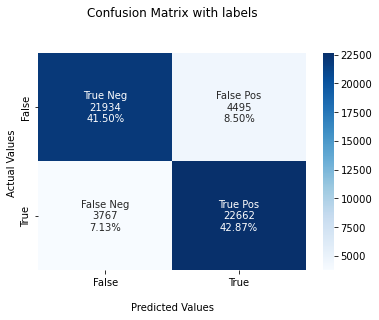

In [23]:
#Plotting the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
#Performance Measure: Precision, Recall and F1 Scorei
from sklearn.metrics import precision_score, recall_score, f1_score

precision=round(precision_score(y_train, y_pred_cv),4)
recall=round(recall_score(y_train, y_pred_cv),4)
f1_score=round(f1_score(y_train, y_pred_cv),4)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ", f1_score)

Precision:  0.8345
Recall:  0.8575
F1 score:  0.8458


In [25]:
#Generating prediction scores

y_scores = sgd_clf.decision_function(x_train) # retrieve classification scores
peek_scores(y_train, y_scores)

actual |  score
------------------
1.0  | 2.788281565032396
1.0  | 2.115321795816093
1.0  | 0.0026908161422363186
0.0  | -3.570122774724487
1.0  | 2.832605001021578
0.0  | -1.192624158514933
1.0  | 3.108667900055601
0.0  | -2.556174229485782
0.0  | -3.70122747027746
1.0  | 3.7191765480123453
0.0  | 2.3272944335538717
0.0  | 0.9903718614080534
1.0  | 5.661458962342252
1.0  | 3.7386755208925275
1.0  | 2.6344486958745317
1.0  | 5.358642381610304
0.0  | -3.2307930960034996
0.0  | -3.3127500933833183
1.0  | 14.248219925228598
0.0  | -1.9680399408913478


In [26]:
#retrieve the average cross-validated prediction score values for all samples 
y_scores_cv = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method="decision_function")
y_scores_cv

array([-3.66556492,  1.1654856 ,  2.6671734 , ...,  4.22060255,
        0.1152965 ,  5.21324012])

In [27]:
#Plot precision and recall graph
from sklearn.metrics import precision_recall_curve

#compute precision-recall pairs for different threshold values 
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_cv)

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
        
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)

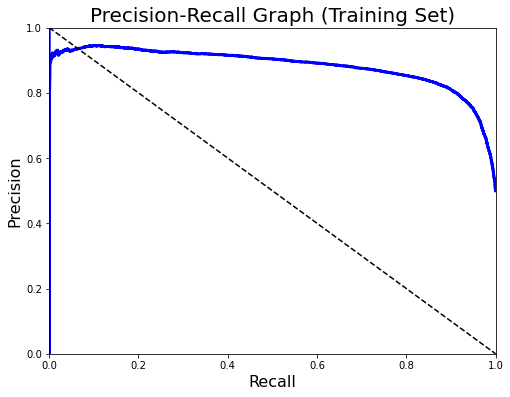

In [29]:
#Plot precision and recall graph
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.show()

In [30]:
#Plot ROC graph
from sklearn.metrics import roc_curve

# Exercise: compute FPR-TPR pairs 
fpr, tpr, thresholds = roc_curve(y_train, y_scores_cv)

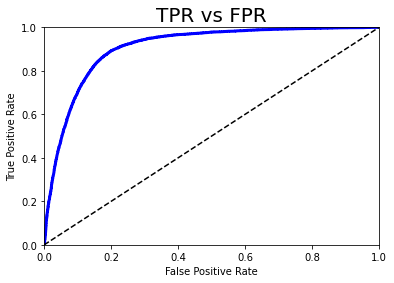

In [31]:
plot_roc_curve(fpr, tpr)

In [32]:
#The AUC (Area under curve) measure
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.9068


In [33]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, penalty=penalty, alpha=alpha, learning_rate=learning_rate, class_weight=class_weight, eta0=eta0)

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, param_distributions=param_distributions, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter=1000) 
random_result = random.fit(x_train, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.936121806822612
Best Params:  {'penalty': 'elasticnet', 'loss': 'log', 'learning_rate': 'invscaling', 'eta0': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'alpha': 0.0001}


C:\Users\shinj\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\shinj\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [34]:
best_model = random.best_estimator_
best_model

SGDClassifier(class_weight={0: 0.5, 1: 0.5}, eta0=1, learning_rate='invscaling',
              loss='log', max_iter=5, penalty='elasticnet')

# Training dataset with best model

Training accuracy:  0.8666


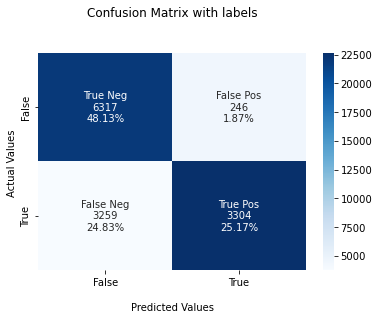

Precision:  0.8634
Recall:  0.8711
F1 score:  0.8672


In [61]:
y_train_predict_manual=best_model.predict(x_train)
acc=accuracy_score(y_train, y_train_predict_manual)
print("Training accuracy: ", round(acc, 4))
#Compute confusion metrics
from sklearn.metrics import confusion_matrix
cm_manual=confusion_matrix(y_train, y_train_predict_manual)
cm_manual

#Plotting the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_test.flatten()/np.sum(cm_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

precision=round(precision_score(y_train, y_train_predict_manual),4)
recall=round(recall_score(y_train, y_train_predict_manual),4)
f1_score=round(f1_score(y_train, y_train_predict_manual),4)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ", f1_score)

# Test Case

In [46]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'most_frequent')
imputer.fit(x_test)
x_test_tr=imputer.transform(x_test)
x_test_tr_pd = pd.DataFrame(x_test_tr, columns = x_test.columns)
x_test_tr_pd.isnull().sum() #no missing value in numerical after replacement of data
#use standard Scaler to [defination], to prevent....
#after the standard scaler function, value of mean and stdev will....
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_test_tr_pd)
x_test_tr=scaler.transform(x_test_tr_pd)
x_test_tr

y_test= pd.DataFrame(y_test)
df_test_tr = np.hstack([x_test_tr, y_test])
df_test_tr=pd.DataFrame(df_test_tr)

In [47]:
X_data_test = df_test_tr.iloc[:, :-1]
Y_data_test = df_test_tr.iloc[:, -1:]

ros = RandomOverSampler(random_state = 42)
   
X_res_test, y_res_test = ros.fit_resample(X_data_test, Y_data_test)
   
X_res_test = pd.DataFrame(X_res_test)
Y_res_test = pd.DataFrame(y_res_test)
   
   
print("After Over Sampling Of Minor Class Total Samples are :", len(Y_res))
print('Class 0        :', round(Y_res[38].value_counts()[0]/len(Y_res) * 100, 2), '% of the dataset')
   
print('Class 1(Fraud) :', round(Y_res[38].value_counts()[1]/len(Y_res) * 100, 2), '% of the dataset')

After Over Sampling Of Minor Class Total Samples are : 52858
Class 0        : 50.0 % of the dataset
Class 1(Fraud) : 50.0 % of the dataset


In [48]:
df_test_tr_ros = np.hstack([X_res_test, Y_res_test])
df_test_tr_ros = pd.DataFrame(df_test_tr_ros)

In [49]:
x_test=df_test_tr_ros.drop(38, axis=1)
y_test=df_test_tr_ros[38]
y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13121    1.0
13122    1.0
13123    1.0
13124    1.0
13125    1.0
Name: 38, Length: 13126, dtype: float64

In [50]:
y_pred_test=best_model.predict(x_test)

In [51]:
y_test = y_test.values;  #convert to numpy array

In [52]:
acc=accuracy_score(y_test, y_pred_test)
print("Training accuracy: ", round(acc, 4))

Training accuracy:  0.733


In [58]:
#Compute confusion metrics
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(y_test, y_pred_test)
cm_test

array([[6317,  246],
       [3259, 3304]], dtype=int64)

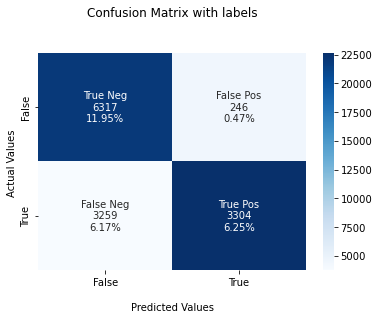

In [60]:
#Plotting the confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_test.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision=round(precision_score(y_test, y_pred_test),4)
recall=round(recall_score(y_test, y_pred_test),4)
f1_score=round(f1_score(y_test, y_pred_test),4)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ", f1_score)

Precision:  0.9307
Recall:  0.5034
F1 score:  0.6534
